polynomial regression
--------------------------------------------------------------------------------

In [105]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
#import matplotlib as plt
import matplotlib.pyplot as plt

In [106]:
from google.colab import files
uploaded = files.upload()

Saving Flipkart Mobile - 2.csv to Flipkart Mobile - 2 (2).csv


In [107]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Flipkart Mobile - 2.csv']))

In [108]:
df2

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Xiaomi,Redmi 6 Pro,Black,Qualcomm,Small,32,3,5.8,2,1,4000,4.3,1870,7999,0.30,1.50
426,Xiaomi,Redmi 6 Pro,Red,Qualcomm,Small,64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73
427,Xiaomi,Mi 11 Lite,Others,Qualcomm,Large,128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42
428,Xiaomi,Redmi 8A Dual,Blue,Qualcomm,Medium,32,3,6.2,2,1,5000,4.2,8161,8299,0.07,6.77


In [109]:
df2_copy = df2.copy()

In [110]:
df2_copy.columns

Index(['brand', 'model', 'base_color', 'processor', 'screen_size', 'ROM',
       'RAM', 'display_size', 'num_rear_camera', 'num_front_camera',
       'battery_capacity', 'ratings', 'num_of_ratings', 'sales_price',
       'discount_percent', 'sales'],
      dtype='object')

In [111]:
df2_copy = df2_copy.drop(['brand', 'model', 'base_color', 'processor','screen_size'],axis= 1)
df2_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ROM               430 non-null    int64  
 1   RAM               430 non-null    int64  
 2   display_size      430 non-null    float64
 3   num_rear_camera   430 non-null    int64  
 4   num_front_camera  430 non-null    int64  
 5   battery_capacity  430 non-null    int64  
 6   ratings           430 non-null    float64
 7   num_of_ratings    430 non-null    int64  
 8   sales_price       430 non-null    int64  
 9   discount_percent  430 non-null    float64
 10  sales             430 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 37.1 KB


In [195]:
df2_copy 

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
...,...,...,...,...,...,...,...,...,...,...,...
425,32,3,5.8,2,1,4000,4.3,1870,7999,0.30,1.50
426,64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73
427,128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42
428,32,3,6.2,2,1,5000,4.2,8161,8299,0.07,6.77


In [113]:
# Train Test Split
price_train, price_test = train_test_split(df2_copy,train_size = 0.5, random_state = 42)

In [114]:
print(price_train.shape)
print(price_test.shape)

(215, 11)
(215, 11)


In [115]:
y_train = price_train.pop('sales')
x_train = price_train

y_test = price_test.pop('sales')
x_test = price_test

In [116]:
#scaling
scaler = StandardScaler()
x_train[x_train.columns]= scaler.fit_transform(x_train[x_train.columns])
x_train.describe()

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent
count,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02
mean,3.712792e-16,6.738796e-17,-1.161345e-15,-2.230774e-16,4.216266e-16,-1.414889e-16,7.652793e-16,4.234339e-17,3.614680e-17,-3.408126e-16
std,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00
min,-1.520479e+00,-1.958029e+00,-4.717251e+00,-2.063202e+00,-1.974385e-01,-2.851088e+00,-8.399855e+00,-3.547356e-01,-8.244507e-01,-1.356827e+00
25%,-6.760803e-01,-6.215965e-01,2.465010e-02,-9.968835e-01,-1.974385e-01,-5.770446e-01,-1.794087e-01,-3.491014e-01,-5.883121e-01,-6.504886e-01
50%,2.889472e-01,2.693585e-01,3.035855e-01,6.943467e-02,-1.974385e-01,-6.021648e-02,-1.794087e-01,-2.736863e-01,-3.957758e-01,-2.266854e-01
75%,2.889472e-01,2.693585e-01,3.035855e-01,1.135753e+00,-1.974385e-01,4.566116e-01,4.529333e-01,-9.807972e-02,1.349645e-01,4.796532e-01
max,6.079112e+00,2.942223e+00,3.371874e+00,1.135753e+00,7.520612e+00,2.523924e+00,1.717617e+00,1.062909e+01,5.360716e+00,4.011346e+00


In [117]:
x_test[x_test.columns]= scaler.fit_transform(x_test[x_train.columns])
x_test.describe()

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent
count,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02
mean,3.511403e-17,-7.126083e-17,-7.513370e-16,-5.964221e-17,-6.725886e-16,-3.822846e-17,1.239319e-15,1.704063e-17,-1.182517e-16,7.229359e-18
std,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00,1.002334e+00
min,-1.590201e+00,-2.011794e+00,-4.358158e+00,-1.945340e+00,-1.965893e-01,-2.692693e+00,-3.838644e+00,-4.947635e-01,-9.164348e-01,-1.319189e+00
25%,-6.494569e-01,-5.905376e-01,-2.600876e-01,-9.075033e-01,-1.965893e-01,-4.990852e-01,-3.504425e-01,-4.763551e-01,-6.277012e-01,-7.912676e-01
50%,4.256787e-01,-5.905376e-01,4.008915e-01,1.303329e-01,-1.965893e-01,1.940392e-02,-3.504425e-01,-3.941974e-01,-3.815790e-01,-2.633466e-01
75%,4.256787e-01,3.569668e-01,4.008915e-01,1.168169e+00,-1.965893e-01,4.980093e-01,3.471977e-01,6.903966e-03,1.777896e-01,6.605151e-01
max,2.575950e+00,3.199480e+00,3.309200e+00,1.168169e+00,5.086747e+00,2.492198e+00,1.742478e+00,8.337138e+00,6.256262e+00,4.355962e+00


In [227]:
from sklearn.preprocessing import PolynomialFeatures

In [228]:
poly = PolynomialFeatures(degree=1)

In [229]:
x_poly = poly.fit_transform(x_train)

In [230]:
poly.fit(x_poly,y_train)

PolynomialFeatures(degree=1)

In [231]:
lr = LinearRegression()

In [232]:
lr.fit(x_poly,y_train)

LinearRegression()

In [233]:
y_pred = lr.predict(x_poly)

In [234]:
x=df2_copy['RAM'].values 

In [235]:
y=df2_copy['sales_price'].values 

In [189]:
x = x.reshape(-1,1)

In [199]:
y

array([ 32999,  57149,  32999,  42999,  69149,  64149,  69149,  64149,
        69149,  69149,  57149,  69149,  62149,  79149,  62149,  47999,
        64149,  64149,  57149,  79149,  72149,  47999,  79149,  64149,
        47999,  47999,  79149,  42999,  57149,  47999,  57149,  62149,
        72149,  42999,  72149,  32999,  72149,  72149,  62149,  72149,
        62149,  79149,  38999,  36999,  47999,  47999,  47999,  42999,
        42999,  42999,  42999,  47999,  69149,  42999,  42999,  79149,
         8999,  10999,   9999,   7999,  11999,   7999,  11999,   9999,
        11999,  10999,  10999,  12999,   8999,   7999,   8999,  18999,
        16499,  18999,  20999,  20999,  14499,  16499,  15999,  18999,
        16499,  15999,  15999,  20999,  12999,  14499,  28999,  14999,
        13999,  13999,  13999,  18999,  30999,  30999,  28999,  26999,
        26999,  21999,  18999,  12999,  14999,  14999,  11499,  16999,
        15999,  15999,  16999,  11499,  11499,  18999,  15999,  10499,
      

In [201]:
poly = PolynomialFeatures(degree=1)

In [202]:
x_poly = poly.fit_transform(x)

In [203]:
poly.fit(x_poly,y)

PolynomialFeatures(degree=1)

In [204]:
lr = LinearRegression()

In [205]:
lr.fit(x_poly,y)

LinearRegression()

In [206]:
y_pred = lr.predict(x_poly)

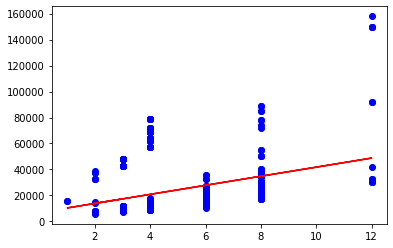

In [207]:
plt.scatter(x,y,color='blue')
plt.plot(x,y_pred, color='red')

In [218]:
from scipy import stats

In [222]:
import matplotlib.pyplot as plt

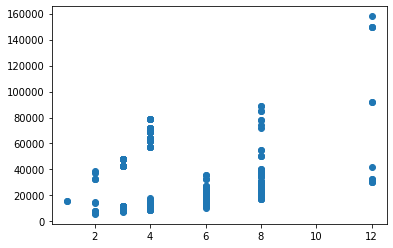

In [224]:
plt.scatter(x,y)
plt.show()